In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from Data_Processing.data_processing import get_filtered_dataframe
from Alpha_Gen.mean_rev_1_alpha_gen import mr1_alpha_gen
from Alpha_Gen.aroon_indicator_alpha_gen import aroon_alpha_gen
from Asset_Alloc.wq_allocator import wq_allocator
from Asset_Alloc.quantymacro_allocator import quantymacro_allocator


In [4]:
# Constants
METRIC = 'Close'
CURRENCIES = ['AUDUSD', 'NZDUSD', 'USDCAD', 'EURUSD', 'USDCHF']
CONVERT_CURRENCIES = ['USDCAD', 'USDCHF']
UPDATED_CURRENCIES = ['AUDUSD', 'NZDUSD', 'CADUSD', 'EURUSD', 'CHFUSD']
START_DATE = '2008-10-16 00:00:00'

LOOKBACK_DAYS = 5
CURRENCY_GROUPINGS = {
    'Commodity Currencies':  ['Close of AUDUSD', 'Close of NZDUSD', 'Close of CADUSD'],
    'European Currencies': ['Close of EURUSD', 'Close of CHFUSD']
}

In [6]:
df = get_filtered_dataframe(METRIC, CURRENCIES, CONVERT_CURRENCIES, UPDATED_CURRENCIES, START_DATE)
df_alpha = mr1_alpha_gen(df, lag_days=LOOKBACK_DAYS)
df_allocation = quantymacro_allocator(df_alpha, group = CURRENCY_GROUPINGS)
df_allocation

c:\Users\sheng\Documents\NUSiQF-FX\Data_Processing\data_processing.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataframe.ffill(inplace=True)


0
2008-10-23 00:00    1.0
2008-10-24 00:00    1.0
2008-10-26 00:00    1.0
2008-10-27 00:00    1.0
2008-10-28 00:00    1.0
                   ... 
2024-10-21 00:00   -1.0
2024-10-22 00:00   -1.0
2024-10-23 00:00    1.0
2024-10-24 00:00    1.0
2024-10-25 00:00    1.0
Name: diff, Length: 5006, dtype: float64
                  Close of AUDUSD  Close of NZDUSD  Close of CADUSD
0                                                                  
2008-10-23 00:00                1                1                1
2008-10-24 00:00                1                1                1
2008-10-26 00:00                1                1                1
2008-10-27 00:00                1                1                1
2008-10-28 00:00                1                1                1
...                           ...              ...              ...
2024-10-21 00:00                1                1                1
2024-10-22 00:00                1                1                1
2024-10-23 00

,Close of AUDUSD,Close of NZDUSD,Close of CADUSD,Close of EURUSD,Close of CHFUSD
0,,,,,
2008-10-23 00:00,0.166667,0.166667,0.166667,-0.25,-0.25
2008-10-24 00:00,0.166667,0.166667,0.166667,-0.25,-0.25
2008-10-26 00:00,0.166667,0.166667,0.166667,-0.25,-0.25
2008-10-27 00:00,0.166667,0.166667,0.166667,-0.25,-0.25
2008-10-28 00:00,0.166667,0.166667,0.166667,-0.25,-0.25
...,...,...,...,...,...
2024-10-21 00:00,-0.166667,-0.166667,-0.166667,0.25,0.25
2024-10-22 00:00,-0.166667,-0.166667,-0.166667,0.25,0.25
2024-10-23 00:00,0.166667,0.166667,0.166667,-0.25,-0.25


In [ ]:
...

In [2]:
df = pd.read_csv(r"C:\Users\admin\Downloads\data.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [13]:
def alpha_gen(input_df: pd.DataFrame, look_back_days: int, start_date: str, end_date: str, currency: str) -> pd.DataFrame:
    df = input_df.copy()
    df = df.loc[start_date:end_date]
    df['returns'] = df[currency].pct_change()
    df['alpha'] = -(df[currency] - df[currency].shift(look_back_days)) / df[currency].shift(look_back_days)
    df['rolling_vol'] = df['returns'].rolling(window=7).std() * np.sqrt(252)
    df['total_position'] = df['alpha'] / df['rolling_vol']
    df = df.dropna()
    return df

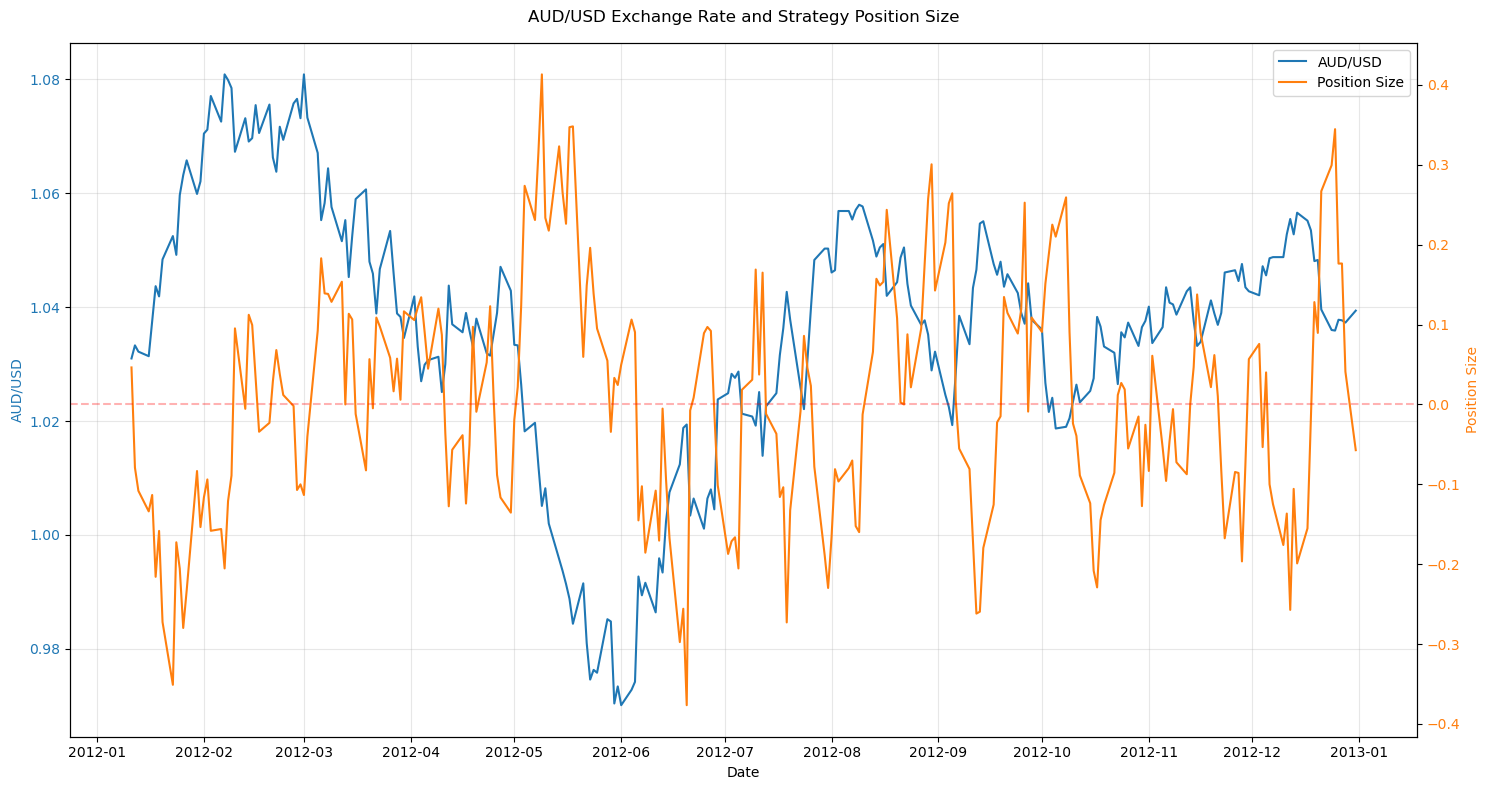


Strategy Statistics:
Average Position: 0.0023
Position Std Dev: 0.1452
Max Position: 0.4133
Min Position: -0.3766


In [14]:
df_filtered = alpha_gen(df, look_back_days=5, start_date='2012-01-01', end_date='2012-12-31', currency='AUDUSD Curncy')

fig, ax1 = plt.subplots(figsize=(15, 8))
ax1.set_xlabel('Date')
ax1.set_ylabel('AUD/USD', color='tab:blue')
line1 = ax1.plot(df_filtered.index, df_filtered['AUDUSD Curncy'], color='tab:blue', label='AUD/USD', linewidth=1.5)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Position Size', color='tab:orange')
line2 = ax2.plot(df_filtered.index, df_filtered['total_position'], color='tab:orange', label='Position Size', linewidth=1.5)
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.3)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('AUD/USD Exchange Rate and Strategy Position Size', pad=15)
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper right')
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print("\nStrategy Statistics:")
print(f"Average Position: {df_filtered['total_position'].mean():.4f}")
print(f"Position Std Dev: {df_filtered['total_position'].std():.4f}")
print(f"Max Position: {df_filtered['total_position'].max():.4f}")
print(f"Min Position: {df_filtered['total_position'].min():.4f}")

In [12]:
import pandas as pd
import numpy as np
from datetime import timedelta
from typing import Dict

def calculate_avg_flip_time(df: pd.DataFrame, currency_list: list) -> Dict[str, timedelta]:
    results = {}
    
    for currency in currency_list:
        signals = alpha_gen(df, 
                          look_back_days=5, 
                          start_date='2001-01-01',
                          end_date='2015-12-31',
                          currency=f'{currency} Curncy')
        position_signs = np.sign(signals['total_position'])
        sign_changes = (position_signs != position_signs.shift(1)) & (position_signs.shift(1) != 0)
        
        # Get timestamps of sign changes
        flip_dates = signals.index[sign_changes]
        
        if len(flip_dates) > 1:
            time_diffs = flip_dates[1:] - flip_dates[:-1]
            avg_time = pd.Timedelta(time_diffs.mean())
            days = int(avg_time.total_seconds() // (24 * 3600))
            remaining_seconds = avg_time.total_seconds() % (24 * 3600)
            hours = int(remaining_seconds // 3600)
            remaining_seconds %= 3600
            minutes = int(remaining_seconds // 60)
            seconds = remaining_seconds % 60
            formatted_time = f"{days} days {hours:02d}:{minutes:02d}:{seconds:.2f}"
            results[currency.replace('_', '/')] = formatted_time
    
    return results

def display_flip_times(flip_times: Dict[str, str]):

    max_currency_length = max(len(currency) for currency in flip_times.keys())
    max_time_length = max(len(time) for time in flip_times.values())
    
    print("\nAverage Time to Flip Sign")
    print("-" * (max_currency_length + max_time_length + 4))
    
    for currency, avg_time in sorted(flip_times.items()):
        print(f"{currency:<{max_currency_length}}  {avg_time}")

currency_pairs = [
    'AUDUSD', 'CHFUSD', 'CADUSD', 'CZKUSD', 'EURUSD',
    'GBPUSD', 'JPYUSD', 'NOKUSD',
    'NZDUSD', 'SEKUSD', 
    'ZARUSD'
]

# Calculate average flip times
flip_times = calculate_avg_flip_time(df, currency_pairs)
display_flip_times(flip_times)


Average Time to Flip Sign
----------------------------
AUDUSD  6 days 21:36:0.00
CADUSD  6 days 13:03:19.35
CHFUSD  7 days 18:58:36.28
CZKUSD  7 days 10:00:26.57
EURUSD  8 days 01:44:5.78
GBPUSD  7 days 01:36:20.28
JPYUSD  7 days 06:37:57.82
NOKUSD  7 days 01:41:24.51
NZDUSD  6 days 21:11:45.15
SEKUSD  6 days 21:12:19.73
ZARUSD  7 days 10:08:0.00


In [7]:
import pandas as pd
import numpy as np

# quantymacro allocator
def quantymacro_allocator(alpha_df: pd.DataFrame, weights: pd.DataFrame = None, group: dict = None) -> pd.DataFrame:
    
    # default group
    if group == None:
        group = {
            'Commodity Currencies':  ['AUDUSD Curncy', 'NZDUSD Curncy', 'CADUSD Curncy'],
            'European Currencies': ['EURUSD Curncy', 'CHFUSD Curncy', 'SEKUSD Curncy', 'NOKUSD Curncy']
        }
    group_keys = list(group.keys())

    # if weights not specified then equal weights
    if weights == None:
        new_weights = alpha_df.copy().map(lambda x: 1)
    else:
        new_weights = weights.copy()
    
    new_df = alpha_df.copy()

    # get alpha of each group
    for grouping in group_keys:
        new_df[grouping] = alpha_df.loc[:, group[grouping]].mean(axis = 1)
    
    # set new column 'diff' to +1 if col 0 > col 1 otherwise -1
    new_df['diff'] = (new_df[group_keys[0]] - new_df[group_keys[1]]).apply(lambda x: x if not x else x // abs(x))

    print(new_df['diff'])
    print(new_weights.loc[:,group[group_keys[0]]])
    
    # set weights to long/short
    new_weights.loc[:,group[group_keys[0]]] = new_weights.loc[:,group[group_keys[0]]].mul(new_df['diff'], axis = 0)
    new_weights.loc[:,group[group_keys[1]]] = new_weights.loc[:,group[group_keys[1]]].mul((-1) * new_df['diff'], axis = 0)

    # neutralise
    new_weights = new_weights.apply(lambda x: x - x.mean(), axis = 1)

    # normalise
    new_weights = new_weights.div(new_weights.abs().sum(axis = 1), axis = 0)

    return new_weights



date
2020-01-10   -1.0
2020-01-13    1.0
2020-01-14    1.0
2020-01-15    1.0
2020-01-16   -1.0
             ... 
2023-09-05   -1.0
2023-09-06   -1.0
2023-09-07    1.0
2023-09-08    1.0
2023-09-11   -1.0
Name: diff, Length: 957, dtype: float64
            AUDUSD Curncy  NZDUSD Curncy  CADUSD Curncy
date                                                   
2020-01-10              1              1              1
2020-01-13              1              1              1
2020-01-14              1              1              1
2020-01-15              1              1              1
2020-01-16              1              1              1
...                   ...            ...            ...
2023-09-05              1              1              1
2023-09-06              1              1              1
2023-09-07              1              1              1
2023-09-08              1              1              1
2023-09-11              1              1              1

[957 rows x 3 columns]


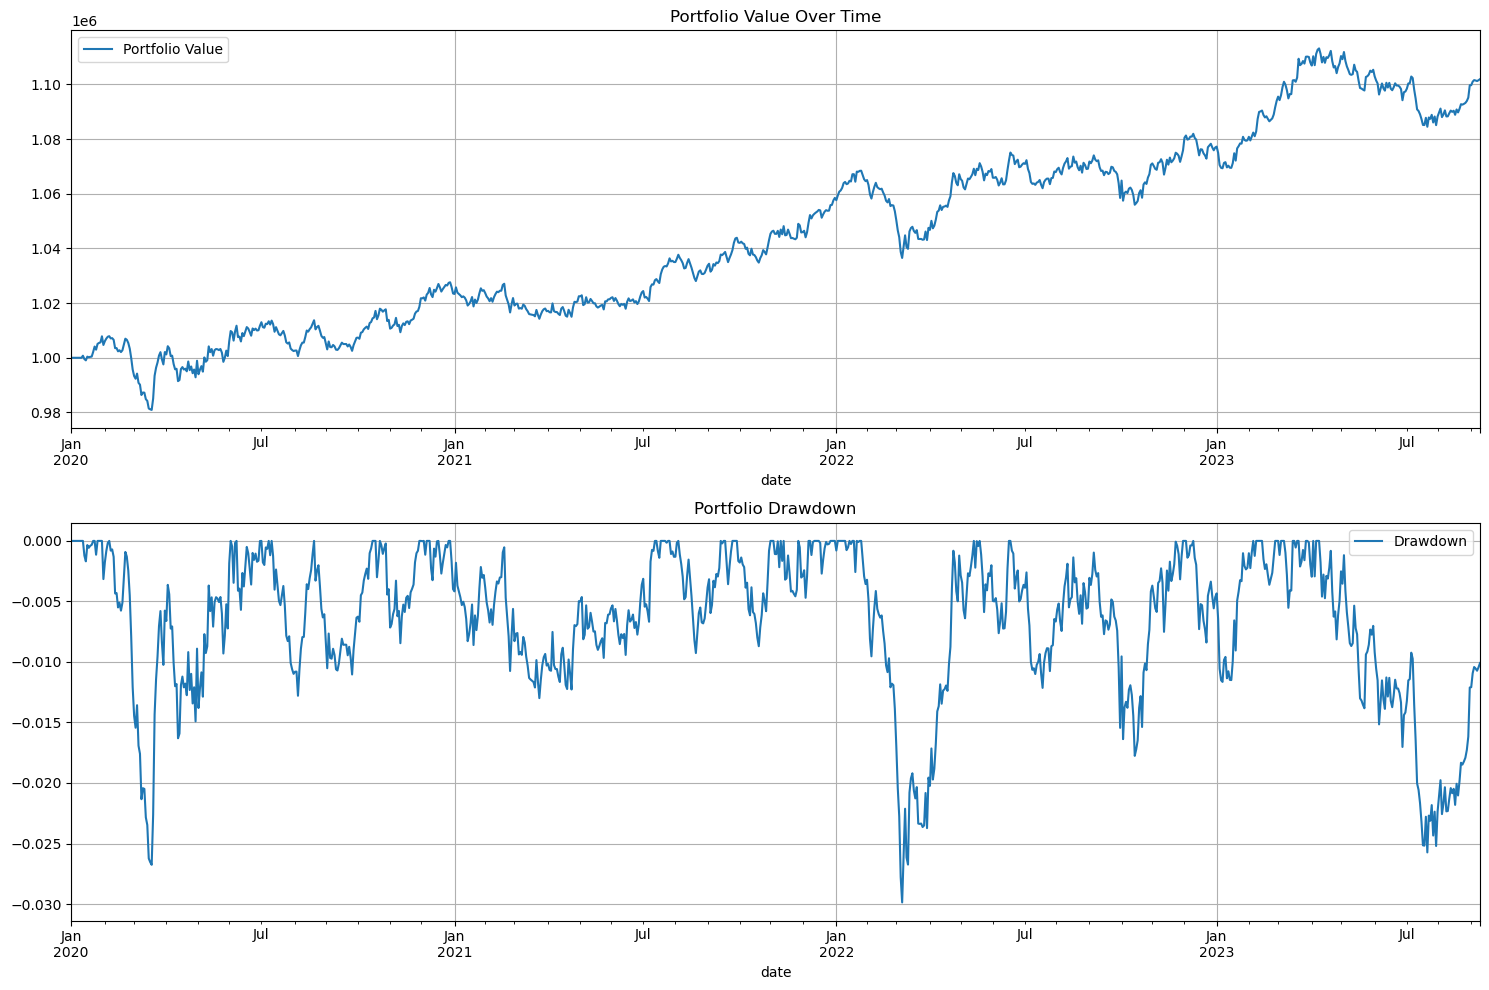


Performance Metrics:
Annual Return: 2.58%
Annual Volatility: 2.87%
Sharpe Ratio: 0.90
Maximum Drawdown: -2.99%


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

def calculate_pnl(
    weights: pd.DataFrame,
    returns: pd.DataFrame,
    initial_capital: float = 1000000
) -> Tuple[pd.DataFrame, pd.Series]:
    # Align the weights with next day's returns for realistic implementation
    strategy_returns = (weights.shift(1) * returns).sum(axis=1)
    
    # Calculate cumulative returns and PnL
    cumulative_returns = (1 + strategy_returns).cumprod()
    portfolio_pnl = initial_capital * cumulative_returns
    
    # Calculate individual position PnL
    position_pnl = weights.shift(1) * returns * initial_capital
    
    return position_pnl, portfolio_pnl

def plot_pnl_analysis(portfolio_pnl: pd.Series, position_pnl: pd.DataFrame = None):
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Portfolio Value Over Time
    plt.subplot(2, 1, 1)
    portfolio_pnl.plot(label='Portfolio Value')
    plt.title('Portfolio Value Over Time')
    plt.grid(True)
    plt.legend()
    
    # Plot 2: Drawdown Analysis
    plt.subplot(2, 1, 2)
    drawdown = portfolio_pnl / portfolio_pnl.cummax() - 1
    drawdown.plot(label='Drawdown')
    plt.title('Portfolio Drawdown')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and print performance metrics
    returns = portfolio_pnl.pct_change().dropna()
    annual_return = returns.mean() * 252
    annual_vol = returns.std() * np.sqrt(252)
    sharpe_ratio = annual_return / annual_vol
    max_drawdown = drawdown.min()
    
    print("\nPerformance Metrics:")
    print(f"Annual Return: {annual_return:.2%}")
    print(f"Annual Volatility: {annual_vol:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Maximum Drawdown: {max_drawdown:.2%}")

def run_strategy_analysis(
    input_df: pd.DataFrame,
    look_back_days: int,
    start_date: str,
    end_date: str,
    currencies: list,
    initial_capital: float = 1000000
):

    # Calculate alpha signals
    alpha_signals = pd.DataFrame()
    for currency in currencies:
        signals = alpha_gen(input_df, look_back_days, start_date, end_date, currency)
        alpha_signals[currency] = signals['total_position']
    
    # Generate weights using the quantymacro allocator
    weights = quantymacro_allocator(alpha_signals)
    
    # Calculate returns for each currency
    returns = input_df.loc[start_date:end_date, currencies].pct_change()
    
    # Calculate PnL
    position_pnl, portfolio_pnl = calculate_pnl(weights, returns, initial_capital)
    
    # Plot results
    plot_pnl_analysis(portfolio_pnl, position_pnl)
    
    return position_pnl, portfolio_pnl, weights

currencies = ['AUDUSD Curncy', 'NZDUSD Curncy', 'CADUSD Curncy', 
              'EURUSD Curncy', 'CHFUSD Curncy', 'SEKUSD Curncy', 'NOKUSD Curncy']
position_pnl, portfolio_pnl, weights = run_strategy_analysis(
    input_df=df,
    look_back_days=5,
    start_date='2020-01-01',
    end_date='2023-12-31',
    currencies=currencies,
    initial_capital=1000000
)
